# Autoencoder on MNIST

In [6]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist # библиотека MNIST
from tensorflow.keras.layers import Dense, Input,Flatten,Reshape

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#стандартизация входных данных
x_train = x_train/255 # 0-1
x_test = x_test/255

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [17]:
input_img = Input((28,28,1)) # изображение будет 28 на 28 пикселей в градациях серого
print(input_img)
x = Flatten()(input_img) # вытягиваем в один вектор в один массив
x = Dense(128,activation='relu')(x)
x = Dense(64,activation='relu')(x)
encoded = Dense(49,activation='relu')(x)

d = Dense(64,activation='relu')(encoded)
d = Dense(28*28,activation='sigmoid')(d) # выдаёт данные от нюля до единицы
decoded = Reshape((28,28,1))(d)

autoencoder = keras.Model(input_img,decoded,name="autoencoder")
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [9]:
batch_size = 100

autoencoder.fit(x_train,x_train,epochs=20,batch_size=batch_size,shuffle=True) #входные и выходные изображения одинаковые для восстановления одного изображения
# shuffle это перемешать

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.0420
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0199
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0159
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0140
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0128
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0118
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0109
Epoch 8/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0103
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0098
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0094
Epoch 11/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0091
Epoch 12/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0088
Epoch 13/20
600/600 [====

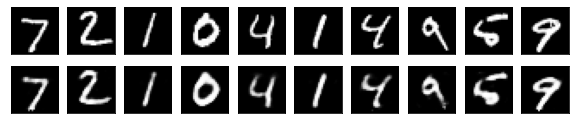

In [10]:
n = 10 
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n],batch_size=n)

plt.figure(figsize = (n,2))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(imgs[i].squeeze(),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot(2,n,i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(),cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [12]:
def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n - images[0].shape[0] # число изображений
    plt.figure(figsize=(n,1))
    for j in range(n):
        ax = plt.subplot(2,n,j+1)
        plt.imshow(images[0][j])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()
    
def plot_homotopy(frm,to,n=10,autoencoder = None):
    z = np.zeros(([n]+list(frm.shape)))
    for i,t in enumerate(np.linspace(0.,1.,n)):
        z[i] = frm * (1-t) + to* t # гомотопия по прямой 
    if autoencoder:
        plot_digits(autoencoder.predict(z,batch_size=n))
    else:
        plot_digits(z)

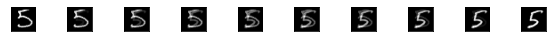

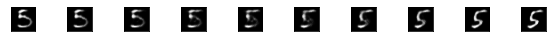

In [13]:
frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm,to)
plot_homotopy(frm,to,autoencoder = autoencoder)